In [128]:
import pandas as pd
import spacy
import re
import numpy as np
import matplotlib.pyplot as plt

In [150]:
## Read in previously scraped lyrics (code for scraping available in different notebook)
queen_df = pd.read_csv('Output/Queen_lyrics.csv', index_col=0)
miley_df = pd.read_csv('Output/MileyCyrus_lyrics.csv', index_col=0)
pitbull_df = pd.read_csv('Output/Pitbull_lyrics.csv', index_col=0)

In [151]:
## Drop NAs from dataframes
queen_df.dropna(inplace=True)
miley_df.dropna(inplace=True)
pitbull_df.dropna(inplace=True)

### Standard string cleaning with built-in python replace functionality and RegEx functions

In [133]:
## Clean up lyrics

def str_cleaner(df): 

    ## Remove the \r\n strings, strip the words and make it lowercase
    Lyrics_clean = [string.replace('\r\n',' ').replace('\n',' ').replace('\'', '').strip().lower() for string in df['Lyrics']]

    ## Remove some other special characters and anything within square brackets, e.g., [chorus]
    Lyrics_clean = [re.sub(r'\[[^]]*\]','',i) for i in Lyrics_clean]
    Lyrics_clean = [re.sub(r'\.','',i) for i in Lyrics_clean]
    Lyrics_clean = [re.sub(r'[ ](?=[ ])|[^-_,A-Za-z0-9 ]+','',i) for i in Lyrics_clean]
    Lyrics_clean = [re.sub(r',','',i) for i in Lyrics_clean]
    
    return Lyrics_clean

In [152]:
queen_clean = str_cleaner(queen_df)
miley_clean = str_cleaner(miley_df)
pitbull_clean = str_cleaner(pitbull_df)

In [135]:
## Balance out the two datasets to contain same amount of lyrics with randomized selection

# if len(queen_clean) < len(miley_clean):
#     rand = list(np.random.randint(0,len(miley_clean)-1,len(queen_clean)))
#     miley_clean = [miley_clean[i] for i in rand]
# else:
#     rand = list(np.random.randint(0,len(queen_clean)-1,len(miley_clean)))
#     queen_clean = [queen_clean[i] for i in rand]

In [136]:
## Check the length of the two datasets

# len(queen_clean) == len(miley_clean), len(queen_clean)

In [ ]:
pitbull

---

### Tokenize with spacy for lemmatisation and stemming

In [10]:
## Import and instantiate spacy nlp model (neural network)
import spacy
nlp = spacy.load('en_core_web_md')

In [23]:
## Function to tokenize (just to get it in a spacy format for further analysis)

def tokenize(lyrics_vect):
    
    tokenized = []

    for song in lyrics_vect:
        tokens = nlp(song)
        tokenized.append(tokens)
        
    return tokenized

In [153]:
tokenized_queen = tokenize(queen_clean)

In [154]:
tokenized_miley = tokenize(miley_clean)

In [155]:
tokenized_pitbull = tokenize(pitbull_clean)

In [139]:
## Function to do the spacy stuff

def spacy_cleaner(song):
    new_song = []
    for word in song:
        if not word.is_stop and not word.is_punct and not word.pos_ == 'NUM':
            lemma = word.lemma_
            new_song.append(lemma)
    return new_song

In [156]:
## Apply lemmatisation defined in above function to every document (lyric) in the Queens lyrics collection

spacy_queen = []
for document in tokenized_queen:
    spacy_queen.append(spacy_cleaner(document))

In [157]:
## Apply lemmatisation defined in above function to every document (lyric) in the Rolling Stones lyrics collection

spacy_miley = []
for document in tokenized_miley:
    spacy_miley.append(spacy_cleaner(document))

In [158]:
spacy_pitbull = []
for document in tokenized_pitbull:
    spacy_pitbull.append(spacy_cleaner(document))

---

### Conduct EDA

In [206]:
## Count number of unique words per song
def unique_words(song):
    unique_list = []
    for word in song:
        if word not in unique_list:
            unique_list.append(word)
    return unique_list

In [207]:
## Create unique count for all songs per artist
def unique_songlist(spacy_obj):
    uq_count = []
    for song in spacy_obj:
        uq_count.append(len(unique_words(song)))
    return uq_count    

In [212]:
## Calculate average unique wordcount per song per artist for later plotting
avg_unique_queen = np.mean(np.array(unique_songlist(spacy_queen)))
avg_unique_miley = np.mean(np.array(unique_songlist(spacy_miley)))
avg_unique_pitbull = np.mean(np.array(unique_songlist(spacy_pitbull)))

In [194]:
## Define function to count unique words in songs over "time"
def unique_count(spacy_obj):

    songs = []
    word_count = []
    uniques = []
    unique_counts = []

    for song in spacy_obj:
        songs.append(' '.join(song))
        wordnr = 0
        for word in song:
            wordnr += 1
            if word not in uniques: 
                uniques.append(word) 
        word_count.append(wordnr)
        unique_counts.append(len(uniques))
    
    return unique_counts, word_count

In [195]:
queen_uq_count, queen_word_count = unique_count(spacy_queen)
miley_uq_count, miley_word_count = unique_count(spacy_miley)
pitbull_uq_count, pitbull_word_count = unique_count(spacy_pitbull)

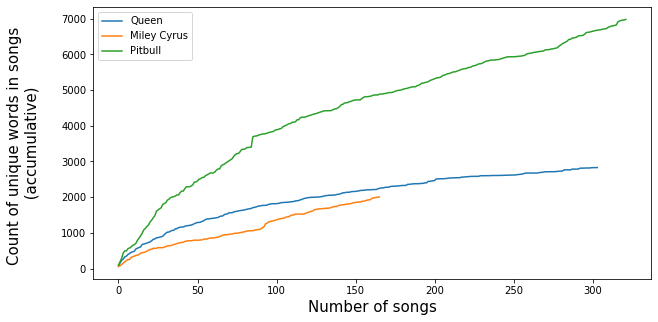

In [190]:
fig = plt.figure(figsize=(10,5))
plt.plot(queen_uq_count, label='Queen')
plt.plot(miley_uq_count, label='Miley Cyrus')
plt.plot(pitbull_uq_count, label='Pitbull')
plt.xlabel('Number of songs', size=15)
plt.ylabel('Count of unique words in songs \n (accumulative) \n', size=15)
plt.legend()

Text(0.5, 1.0, 'Number of songs produced per artist \n')

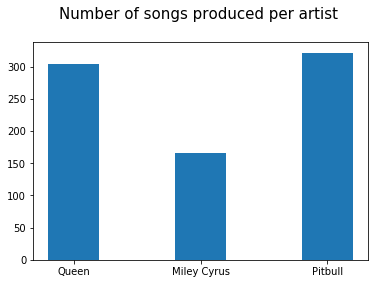

In [191]:
plt.bar(['Queen','Miley Cyrus','Pitbull'], height=[len(queen_count),len(miley_count),len(pitbull_count)],width=0.4)
plt.title('Number of songs produced per artist \n', size=15)

Text(0.5, 1.0, 'Number of words used per song artist \n')

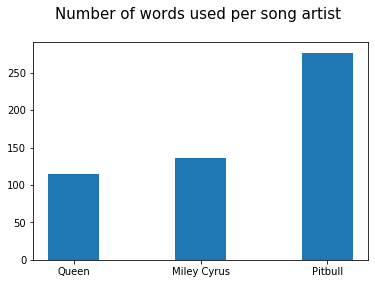

In [196]:
plt.bar(['Queen','Miley Cyrus','Pitbull'], height=[np.mean(np.array(queen_word_count)),np.mean(np.array(miley_word_count)),np.mean(np.array(pitbull_word_count))],width=0.4)
plt.title('Number of words used per song artist \n', size=15)

Text(0.5, 1.0, 'Number of unique words used per song artist \n')

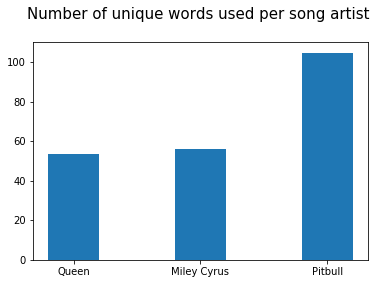

In [214]:
plt.bar(['Queen','Miley Cyrus','Pitbull'], height=[avg_unique_queen, avg_unique_miley, avg_unique_pitbull],width=0.4)
plt.title('Number of unique words used per song artist \n', size=15)